In [ ]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 918.2/918.2 kB 50.4 MB/s eta 0:00:00


In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from statsmodels. tsa.stattools import adfuller
#from arch.unitroot import PhillipsPerron, ADF
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import datetime 

%matplotlib inline

sns.set(style="darkgrid")


In [4]:
ans = pd.read_csv('/content/new_for_cource.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from itertools import product
from statsmodels.tsa.arima_model import ARIMA

In [5]:
base = datetime.datetime(1960, 1, 1)
date_list = [base + datetime.timedelta(days=x) for x in range(21915)]
date_list[-1]

datetime.datetime(2019, 12, 31, 0, 0)

In [6]:
ssn = pd.DataFrame()

In [12]:
ssn['date'] = date_list
ssn['ans'] = ans
#ssn.set_index(ssn['date'])
ssn = ssn.reset_index()

In [13]:
ssn.to_csv('ssn_forr.csv', index= False)

In [7]:
data = pd.read_csv('/content/data (1).csv')
data.head()

,index,Timestamp,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,...,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,ans
0,1998-02-15,00:00:00,0,8.77,5.69,20.84,-4.83,-10.06,6.68,2.10,...,4.52,0.29,16.60,400.10,318.41,467.43,54548.0,13443.0,215499.0,81.0
1,1998-02-20,00:00:00,0,5.18,3.13,23.99,0.38,-5.76,5.24,0.16,...,2.53,0.75,6.35,392.02,326.39,474.51,71561.0,15786.0,185234.0,35.0
2,1998-02-25,00:00:00,0,4.87,2.37,12.49,1.16,-6.73,4.48,0.56,...,2.71,0.48,20.51,359.05,304.87,439.40,57475.0,11069.0,148318.0,72.0
3,1998-03-02,00:00:00,0,7.37,2.57,20.03,0.43,-7.09,6.45,0.08,...,2.62,0.50,14.84,372.75,303.04,495.89,32613.0,10464.0,175143.0,100.0
4,1998-03-07,00:00:00,0,5.83,1.77,22.52,-0.77,-10.94,9.64,-0.53,...,2.74,0.60,12.23,303.19,274.03,551.26,20516.0,10435.0,406549.0,54.0


In [9]:
data = data.drop(['index', 'Timestamp'], axis = 1)

In [21]:
x = data.iloc[:-20]
y = data['ans'][20:]

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
x_train, x_test = x[:-73], x[-73:] 
y_train, y_test = y[:-73], y[-73:]

In [24]:
linreg = LinearRegression()

In [25]:
linreg.fit(x_train, y_train)

LinearRegression()

In [26]:
x_train

,Source,Bt-med,Bt-min,Bt-max,Bx-med,Bx-min,Bx-max,By-med,By-min,By-max,...,Dens-med,Dens-min,Dens-max,Speed-med,Speed-min,Speed-max,Temp-med,Temp-min,Temp-max,ans
0,0,8.77,5.69,20.84,-4.83,-10.06,6.68,2.10,-9.15,17.48,...,4.52,0.29,16.60,400.10,318.41,467.43,54548.0,13443.0,215499.0,81.0
1,0,5.18,3.13,23.99,0.38,-5.76,5.24,0.16,-4.79,6.23,...,2.53,0.75,6.35,392.02,326.39,474.51,71561.0,15786.0,185234.0,35.0
2,0,4.87,2.37,12.49,1.16,-6.73,4.48,0.56,-5.31,10.77,...,2.71,0.48,20.51,359.05,304.87,439.40,57475.0,11069.0,148318.0,72.0
3,0,7.37,2.57,20.03,0.43,-7.09,6.45,0.08,-10.94,7.53,...,2.62,0.50,14.84,372.75,303.04,495.89,32613.0,10464.0,175143.0,100.0
4,0,5.83,1.77,22.52,-0.77,-10.94,9.64,-0.53,-15.66,18.02,...,2.74,0.60,12.23,303.19,274.03,551.26,20516.0,10435.0,406549.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,2,4.51,1.17,10.60,2.65,-3.55,8.02,-1.43,-6.27,9.51,...,5.37,2.18,17.89,382.90,318.50,476.00,82776.0,17339.0,285251.0,0.0
1681,1,5.61,1.61,12.26,2.77,-5.02,9.29,-2.89,-8.75,3.94,...,8.49,4.59,17.81,555.70,373.20,605.20,206383.0,25241.0,499862.0,9.0
1682,1,3.86,0.54,9.28,-0.23,-4.16,5.55,-0.28,-7.38,4.65,...,6.36,3.79,23.75,438.60,351.70,505.40,75610.0,12108.0,203015.0,38.0
1683,1,4.87,1.92,13.10,2.88,-6.02,8.77,-1.57,-8.44,6.24,...,8.55,4.16,25.29,485.00,367.00,662.50,195662.0,23623.0,529091.0,10.0


In [27]:
linreg.coef_

array([-5.34306689e+00,  5.57279486e+00, -1.11828140e+00,  8.74285489e-01,
       -2.89215759e-01, -1.61041508e+00,  3.27387912e-01, -8.87423186e-01,
       -4.28765300e-01, -9.35047832e-01, -8.78932089e+00,  1.14174852e+00,
       -6.15358300e-01,  2.30590242e-02,  1.41543821e-01, -5.13104403e-02,
        6.39810145e-01, -1.92658070e-01,  3.45615405e-01, -1.77034089e+00,
        1.95828887e+00,  5.35169960e-02, -4.30148049e-02,  8.28034336e-02,
       -3.87313936e-02, -4.03591141e-05, -4.88345746e-05,  2.93218937e-06,
        6.26018364e-01])

In [28]:
pred = linreg.predict(x_train)

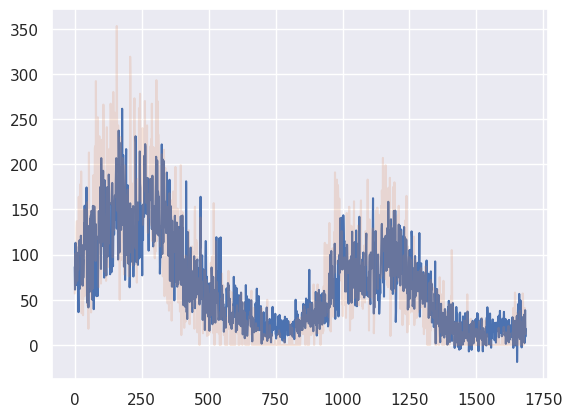

In [29]:
plt.plot(pred)
plt.plot(y_train.values, alpha =0.2)

In [33]:
rmse = lambda x,y: np.sqrt(np.mean((x-y)**2))

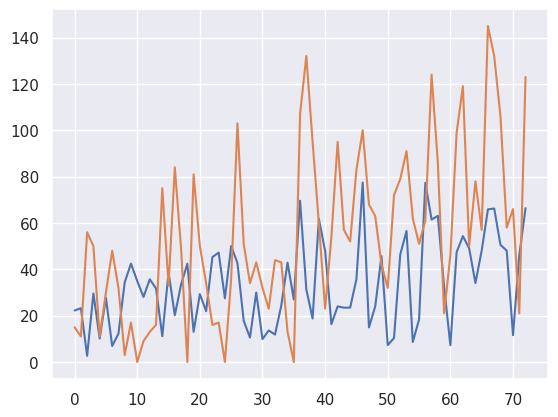

In [34]:
pred_t = linreg.predict(x_test)
plt.plot(pred_t)
plt.plot(y_test.values)

In [35]:
rmse(pred_t, y_test)

39.94486451423001

In [36]:
rmse(pred, y_train)

42.358334463250955

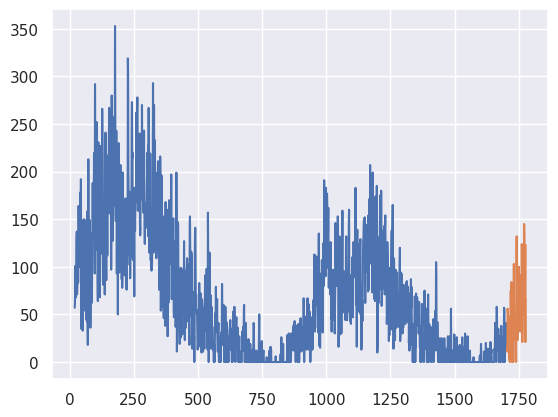

In [39]:
plt.plot(y_train)
plt.plot(y_test)

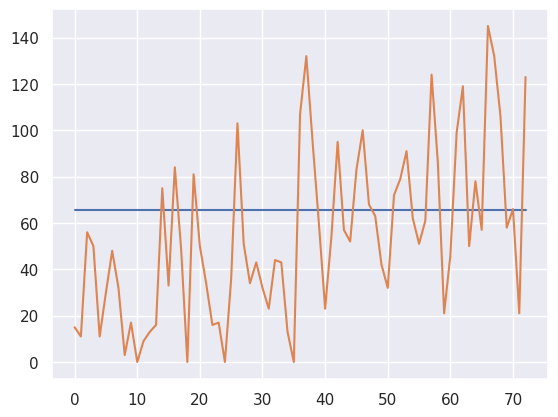

In [38]:
plt.plot(np.ones_like(y_test)*y_train.mean())
plt.plot(y_test.values)

In [37]:
rmse(y_train.mean(), y_test)

37.966635537472946

In [7]:
ssn = pd.DataFrame()
base = datetime.datetime(1960, 1, 1)
date_list = [base + datetime.timedelta(days=x) for x in range(21915)]
ssn['date'] = date_list
ssn['ans'] = ans

In [8]:
df = ssn
date_list = [base + datetime.timedelta(days=x) for x in range(21915)]
df['index'] = date_list
df = df.rename(columns={"index":"ds", "ans":'y'})

In [48]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df.iloc[:-11*365]['y'], order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                17900
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -75063.780
Date:                Wed, 17 May 2023   AIC                         150133.559
Time:                        19:07:34   BIC                         150156.937
Sample:                             0   HQIC                        150141.249
                              - 17900                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2131      0.006     37.587      0.000       0.202       0.224
ar.L2          0.0569      0.006      9.820      0.000       0.046       0.068
sigma2       257.1576      1.858    138.418      0.0

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

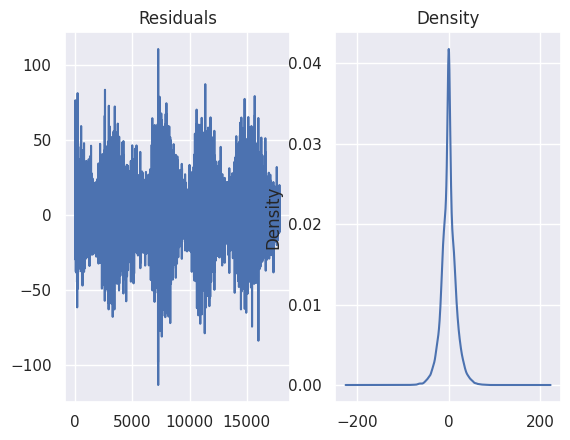

In [52]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

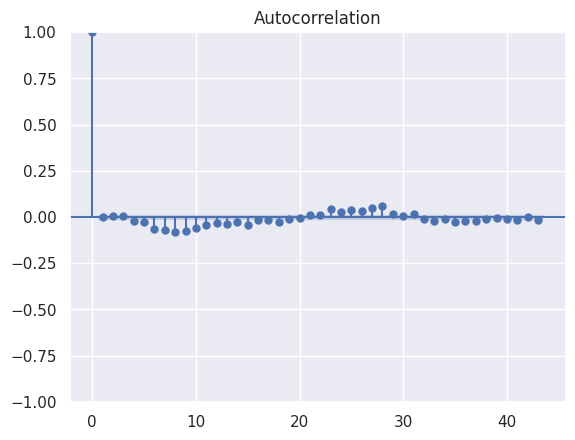

In [53]:
acf_res = plot_acf(residuals)

In [56]:
forecast_test = model_fit.forecast(11*365)

df['forecast_manual'] = [None]*len(df.iloc[:-11*365]['y']) + list(forecast_test)

df

,date,y,ds,forecast_manual
0,1960-01-01,193,1960-01-01,NaN
1,1960-01-02,200,1960-01-02,NaN
2,1960-01-03,210,1960-01-03,NaN
3,1960-01-04,227,1960-01-04,NaN
4,1960-01-05,238,1960-01-05,NaN
...,...,...,...,...
21910,2019-12-27,0,2019-12-27,-1.470149e-185
21911,2019-12-28,0,2019-12-28,-1.470149e-185
21912,2019-12-29,0,2019-12-29,-1.470149e-185
21913,2019-12-30,0,2019-12-30,-1.470149e-185


In [57]:
forecast_test

17900   -1.464555e-185
17901   -1.467779e-185
17902   -1.469326e-185
17903   -1.469839e-185
17904   -1.470036e-185
             ...      
21910   -1.470149e-185
21911   -1.470149e-185
21912   -1.470149e-185
21913   -1.470149e-185
21914   -1.470149e-185
Name: predicted_mean, Length: 4015, dtype: float64

In [9]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import pmdarima as pm

In [61]:
auto_arima = pm.auto_arima(df.iloc[:-11*365]['y'], stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
df.iloc[:-11*365]['y'].plot()

In [62]:
forecast_test_auto = auto_arima.predict(n_periods=11*365)

In [63]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                17900
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -74311.690
Date:                Wed, 17 May 2023   AIC                         148635.381
Time:                        19:26:18   BIC                         148682.136
Sample:                             0   HQIC                        148650.760
                              - 17900                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0007      0.001     -0.542      0.587      -0.003       0.002
ar.L1          1.7072      0.009    187.406      0.000       1.689       1.725
ar.L2         -0.7715      0.008    -93.167      0.000      -0.788      -0.755
ma.L1         -1.5927      0.012   -135.995      0.000      -1.616      -1.570
ma.L2          0.6029      0.012     51.785      0.000       0.580       0.626
sigma2       236.5463      1.715    137.928      0.000     233.185     239.908
===================================================================================
Ljung-Box (L1) (Q):                   4.01   Jarque-Bera (JB):              4197.83
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.22
Prob(H) (two-sided):                  0.93   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

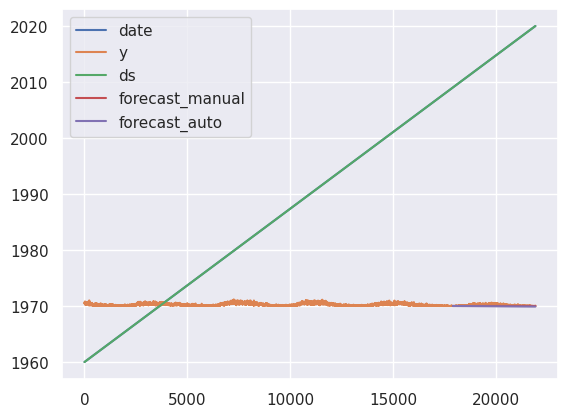

In [64]:
df['forecast_auto'] = [None]*(len(df) - 11*365) + list(forecast_test_auto)

df.plot()

<Axes: >

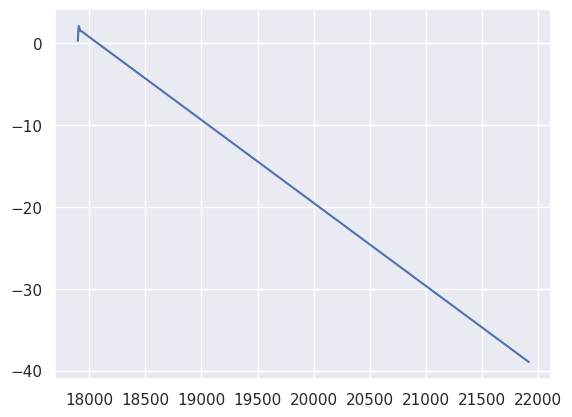

In [66]:
df['forecast_auto'].plot()

In [67]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df.iloc[-11*365:]['y'], forecast_test_auto)
mape = mean_absolute_percentage_error(df.iloc[-11*365:]['y'], forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df.iloc[-11*365:]['y'], forecast_test_auto))

In [68]:
rmse

82.16233372605008

In [69]:
auto_sarima = pm.auto_arima(df.iloc[:-11*365]['y'], m = 12, stepwise=False, seasonal=True)
auto_sarima

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [70]:
test_auto = auto_sarima.predict(n_periods=11*365)

In [71]:
df['auto'] = [None]*(len(df) - 11*365) + list(test_auto)

In [73]:
rmse = np.sqrt(mean_squared_error(df.iloc[-11*365:]['y'], test_auto))
rmse

82.16233372605008

In [ ]:
sarima = pm.auto_arima(df.iloc[:-11*365]['y'], stepwise=False, seasonal=True)
sarima

In [25]:
data = df.iloc[::30]
data_train, data_test = data.iloc[:-12*4], data.iloc[-12*4:]


In [ ]:
sarima = pm.auto_arima(data_train['y'], m = 12*11, stepwise=False, seasonal=True)
sarima

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
y_pred_sarima = sarima.predict(len(data_test))
#df['auto'] = [None]*(len(data_train)) + list(y_pred_sarima)
rmse = np.sqrt(mean_squared_error(data.iloc[-2*365:]['y'], y_pred_sarima))
rmse

In [ ]:
plt.plot(data_train["y"])
plt.plot(y_pred_sarima)
plt.plot(data_test["y"])

In [21]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

ValueError: ignored